In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.2)

The effect of vaccination is checked against the following outputs
- the maximum number of infections at one time
- the maximum number of reinfections
- number of days that more than 1% of the population is infected 
- proportion of infecteds after 2 years 

In [23]:
def plot_network_properties(parameter,hub=False): #,days,imlen=90
    col = 'k'
    size = 1
    print(parameter)
    result_files = glob.glob("../Results/Vaccine/*.csv")
    #result_files = [f for f in result_files if "vacdays{}".format(days) in f]
    #result_files = [f for f in result_files if "imlen{}".format(imlen) in f]
    if hub:
        result_files = [f for f in result_files if "hub" in f]
        hub_param = "Hub"
    else:
        result_files = [f for f in result_files if "hub" not in f]
        hub_param = "Random"
     
    x, y1, y2, y3, y4 = ([] for i in range(5))
    for file in result_files:
        result = pd.read_csv(file)
        x = x + list(np.array(pd.to_numeric(result[parameter],errors='coerce')))
        y1 = y1 + list(pd.to_numeric(result['max_infs'],errors='coerce')/10000*100)
        y2 = y2 + list(pd.to_numeric(result['prop_inf'],errors='coerce')/10000*100)
        y3 = y3 + list(pd.to_numeric(result['max_reinf'],errors='coerce'))
        y4 = y4 + list(pd.to_numeric(result['no_peaks'],errors='coerce')/730*100)
    df1 = pd.DataFrame({'x':x,'y':y1})
    df2 = pd.DataFrame({'x':x,'y':y2})
    df3 = pd.DataFrame({'x':x,'y':y3})
    df4 = pd.DataFrame({'x':x,'y':y4})
    f1 = sns.catplot(y="y", x="x", kind="violin", data=df1, cut=0)
    f1.set_xlabels(parameter)
    f1.set_ylabels("Max. % infected at one time")
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}_{}_A.svg".format(parameter,hub))
    f2 = sns.catplot(y="y", x="x", kind="violin", data=df2, cut=0)
    f2.set_xlabels(parameter)
    f2.set_ylabels('% of infecteds after 2 years')
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}_{}_B.svg".format(parameter,hub))
    f3 = sns.catplot(y="y", x="x", kind="violin", data=df3, cut=0)
    f3.set_xlabels(parameter)
    f3.set_ylabels('Max. number of reinfections')
    plt.tight_layout()
    plt.savefig("../Results/FinalFigures/{}_{}_C.svg".format(parameter,hub))
    f4 = sns.catplot(y="y", x="x", kind="violin", data=df4, cut=0)
    f4.set_xlabels(parameter)
    f4.set_ylabels("% of days  for which > 1% is infected")
    plt.tight_layout()
    #plt.savefig("../Results/FinalFigures/{}_vacdays{}_imlen{}_D_{}.svg".format(parameter,days,imlen,hub_param))
    plt.savefig("../Results/FinalFigures/{}_{}_D.svg".format(parameter,hub))
    plt.tight_layout()
    plt.show()
    plt.close()

NO HUB
Vaccinated


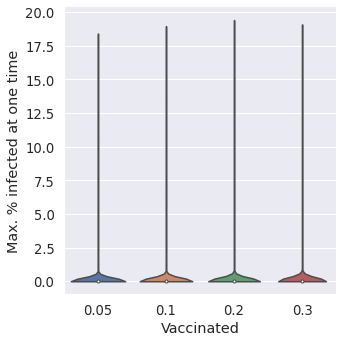

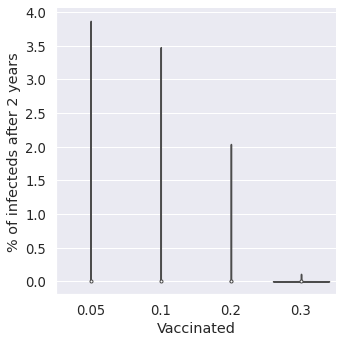

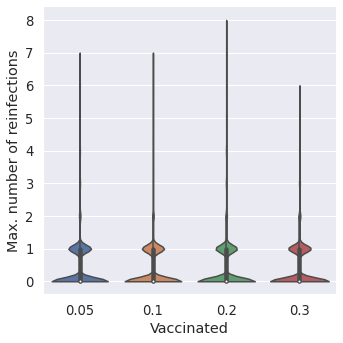

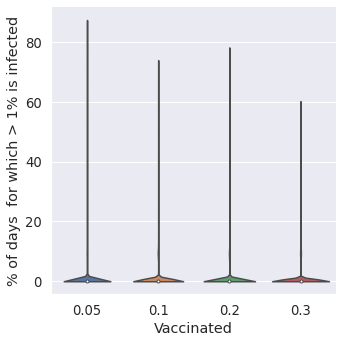

HUB
Vaccinated


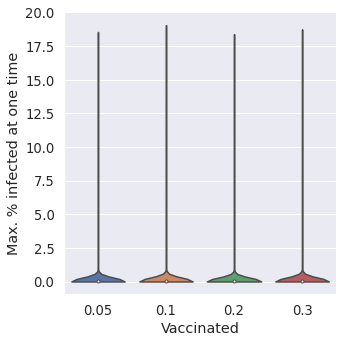

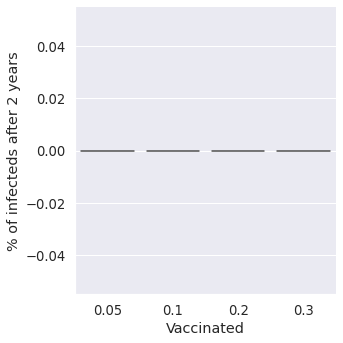

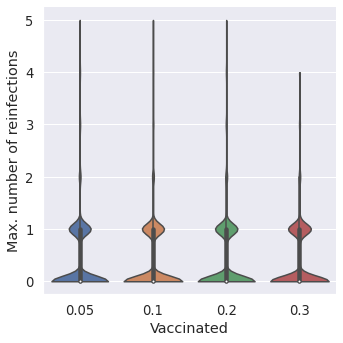

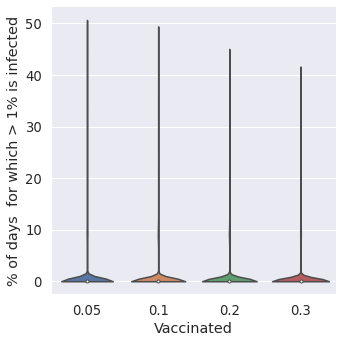

In [24]:
print("NO HUB")
plot_network_properties('Vaccinated')
print("HUB")
plot_network_properties('Vaccinated',hub=True)